Fig.1: Spearman coefficient (Type 3)

0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.69
0.7
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.82
0.83
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99
1.0


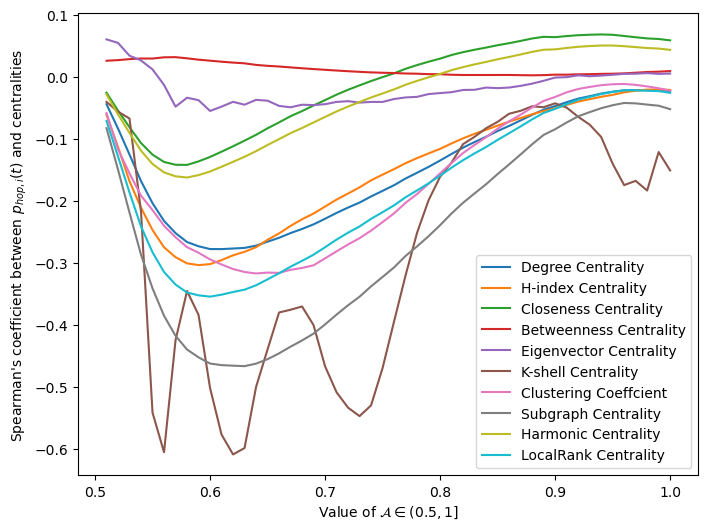

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

gap = 0.01
T_min = 0.51
T_max = 1+gap
sep = np.floor((T_max - T_min) / gap).astype(np.int16)
T = np.zeros(sep, dtype = "float64")
T[0] = T_min
T[1] = T_min + gap
for i in range(2, sep):
    T[i] = T[i-1] + gap
T = T.astype(np.float32)
f_c = T

cr0 = np.zeros((sep), dtype = "float32")
cr1 = np.zeros((sep), dtype = "float32")
cr2 = np.zeros((sep), dtype = "float32")
cr3 = np.zeros((sep), dtype = "float32")
cr4 = np.zeros((sep), dtype = "float32")
cr5 = np.zeros((sep), dtype = "float32")
cr6 = np.zeros((sep), dtype = "float32")
cr7 = np.zeros((sep), dtype = "float32")
cr9 = np.zeros((sep), dtype = "float32")
cr11 = np.zeros((sep), dtype = "float32")

num_set = np.array([0,1,2,3,4,5,6,7,8,9])
time_set = np.array([100,200,300,400,500,600,700,800,900])

counter = 0
for f in f_c:
    x_0 = np.zeros((0), dtype = "float32")
    x_1 = np.zeros((0), dtype = "float32")
    x_2 = np.zeros((0), dtype = "float32")
    x_3 = np.zeros((0), dtype = "float32")
    x_4 = np.zeros((0), dtype = "float32")
    x_5 = np.zeros((0), dtype = "float32")
    x_6 = np.zeros((0), dtype = "float32")
    x_7 = np.zeros((0), dtype = "float32")
    x_9 = np.zeros((0), dtype = "float32")
    x_11 = np.zeros((0), dtype = "float32")
    y_ = np.zeros((0), dtype = "float32")
    
    for time in time_set:    
        for num in num_set:
            file = "Corr/cen_origin/D_" + str(int(num)) + "/X_" + str(int(time)) + "_r_2.5_f_" + str(f_c[counter]) + ".npy"
            p_hop = np.load("Corr/data/D_" + str(int(num)) + "/P_hop_" + str(int(time)) + ".npy", allow_pickle=True)
            X = np.load(file, allow_pickle=True)
            sh = np.load("Corr/data/D_" + str(int(num)) + "/Y_" + str(int(time)) + ".npy", allow_pickle=True)
            x0 = X[:, 0]
            x1 = X[:, 1]
            x2 = X[:, 2]
            x3 = X[:, 3]
            x4 = X[:, 4]
            x5 = X[:, 5]
            x6 = X[:, 6]
            x7 = X[:, 7]
            x9 = X[:, 9]
            x11 = X[:, 11]
            y = p_hop
            x_0 = np.concatenate((x_0, x0), axis=0)
            x_1 = np.concatenate((x_1, x1), axis=0)
            x_2 = np.concatenate((x_2, x2), axis=0)
            x_3 = np.concatenate((x_3, x3), axis=0)
            x_4 = np.concatenate((x_4, x4), axis=0)
            x_5 = np.concatenate((x_5, x5), axis=0)
            x_6 = np.concatenate((x_6, x6), axis=0)
            x_7 = np.concatenate((x_7, x7), axis=0)
            x_9 = np.concatenate((x_9, x9), axis=0)
            x_11 = np.concatenate((x_11, x11), axis=0)
            y_ = np.concatenate((y_, y), axis=0)
            
    corr_0, p_value_0 = spearmanr(x_0, y_)
    corr_1, p_value_1 = spearmanr(x_1, y_)
    corr_2, p_value_2 = spearmanr(x_2, y_)
    corr_3, p_value_3 = spearmanr(x_3, y_)
    corr_4, p_value_4 = spearmanr(x_4, y_)
    corr_5, p_value_5 = spearmanr(x_5, y_)
    corr_6, p_value_6 = spearmanr(x_6, y_)
    corr_7, p_value_7 = spearmanr(x_7, y_)
    corr_9, p_value_9 = spearmanr(x_9, y_)
    corr_11, p_value_11 = spearmanr(x_11, y_)
    
    cr0[counter] = corr_0
    cr1[counter] = corr_1
    cr2[counter] = corr_2
    cr3[counter] = corr_3
    cr4[counter] = corr_4
    cr5[counter] = corr_5
    cr6[counter] = corr_6
    cr7[counter] = corr_7
    cr9[counter] = corr_9
    cr11[counter] = corr_11
    
    print(f_c[counter])
    counter = counter + 1

plt.figure(figsize=(8,6))

plt.plot(f_c,cr0,label="Degree Centrality")
plt.plot(f_c,cr1,label="H-index Centrality")
plt.plot(f_c,cr2,label="Closeness Centrality")
plt.plot(f_c,cr3,label="Betweenness Centrality")
plt.plot(f_c,cr4,label="Eigenvector Centrality")
plt.plot(f_c,cr5,label="K-shell Centrality")
plt.plot(f_c,cr6,label="Clustering Coeffcient")
plt.plot(f_c,cr7,label="Subgraph Centrality")
plt.plot(f_c,cr9,label="Harmonic Centrality")
plt.plot(f_c,cr11,label="LocalRank Centrality")
plt.xlabel("Value of $\mathcal{A} \in (0.5,1]$")
plt.ylabel("Spearman's coefficient between $p_{hop,i}(t)$ and centralities")
plt.legend()

# plt.savefig("/home/chem/msrgxt/Desktop/b.png", dpi = 300)

plt.show()

Fig.2 Left: Hard particle counter N(t)

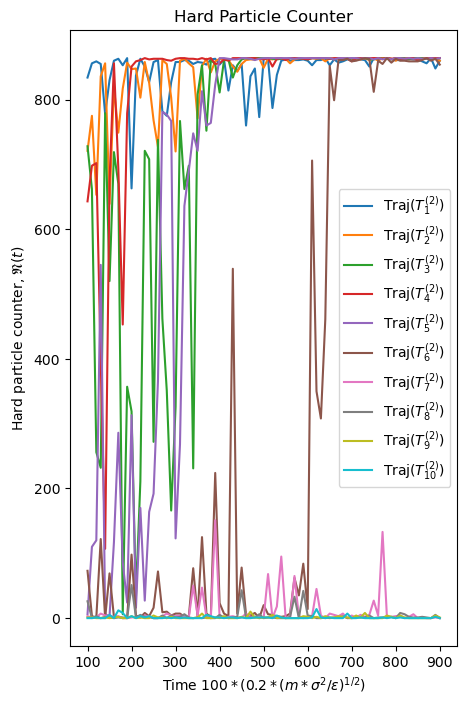

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

set_ = 2
select = 5
num = 10

parameter = np.zeros((num), dtype = "object")
f = np.zeros((num), dtype = "object")


gap = 10
T_min = 100
T_max = 900+gap
sep = np.floor((T_max - T_min) / gap).astype(np.int16)
T = np.zeros(sep, dtype = "float64")
T[0] = T_min
T[1] = T_min + gap
for i in range(2, sep):
    T[i] = T[i-1] + gap
T = T.astype(np.float32)
x = T

# plt.figure(figsize=[10,7.5])

plt.figure(figsize=[5,8])

for i in range(num):
    file = "set_" + str(int(set_)) + "_/ans_" + str(int(select)) + "_t_" + str(int(i)) + ".csv"
    y = pd.read_csv(file, header=None)
    y = np.transpose(y.values)
        
    f[i] ,= plt.plot(x,y)
    
# plt.legend(handles=[f[0],f[1],f[2],f[3],f[4],f[5],f[6],f[7],f[8],f[9]], labels = ["Traj$(T^{(1)}_{1})$","Traj$(T^{(1)}_{2})$","Traj$(T^{(1)}_{3})$","Traj$(T^{(1)}_{4})$","Traj$(T^{(1)}_{5})$","Traj$(T^{(1)}_{6})$","Traj$(T^{(1)}_{7})$","Traj$(T^{(1)}_{8})$","Traj$(T^{(1)}_{9})$","Traj$(T^{(1)}_{10})$"], loc="best")
plt.legend(handles=[f[0],f[1],f[2],f[3],f[4],f[5],f[6],f[7],f[8],f[9]], labels = ["Traj$(T^{(2)}_{1})$","Traj$(T^{(2)}_{2})$","Traj$(T^{(2)}_{3})$","Traj$(T^{(2)}_{4})$","Traj$(T^{(2)}_{5})$","Traj$(T^{(2)}_{6})$","Traj$(T^{(2)}_{7})$","Traj$(T^{(2)}_{8})$","Traj$(T^{(2)}_{9})$","Traj$(T^{(2)}_{10})$"], loc="best")

plt.title("Hard Particle Counter")
plt.xlabel("Time $100*(0.2*(m*\sigma^2/\epsilon)^{1/2})$")
plt.ylabel("Hard particle counter, $\mathfrak{N}(t)$")
# plt.savefig("/home/chem/msrgxt/Desktop/counter.png", dpi = 300)
plt.show()

Fig.2 Right: Hard particle counter S(t)

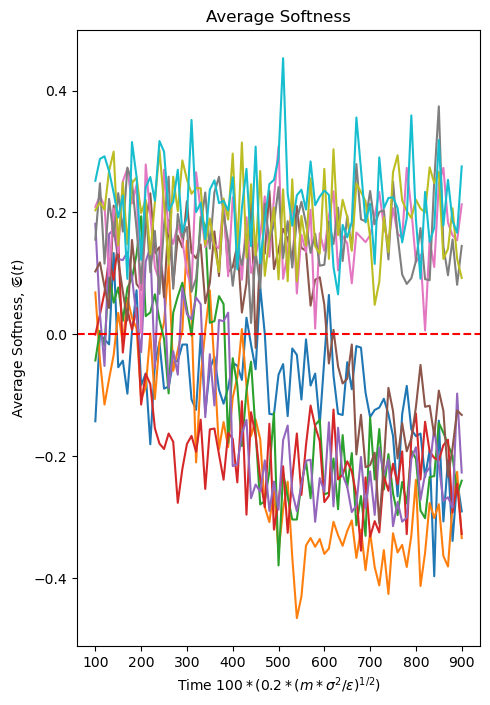

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

set_ = 2
select = 5
num = 10

parameter = np.zeros((num), dtype = "object")
f = np.zeros((num), dtype = "object")


gap = 10
T_min = 100
T_max = 900+gap
sep = np.floor((T_max - T_min) / gap).astype(np.int16)
T = np.zeros(sep, dtype = "float64")
T[0] = T_min
T[1] = T_min + gap
for i in range(2, sep):
    T[i] = T[i-1] + gap
T = T.astype(np.float32)
x = T

# plt.figure(figsize=[10,7.5])

plt.figure(figsize=[5.2,8])

for i in range(num):
    file = "softness_" + str(int(set_)) + "/ans_" + str(int(select)) + "_t_" + str(int(i)) + ".csv"
    y = pd.read_csv(file, header=None)
    y = np.transpose(y.values)
        
    f[i] ,= plt.plot(x,y)

plt.axhline(y=0, color='r', linestyle='--')

# plt.legend(handles=[f[0],f[1],f[2],f[3],f[4],f[5],f[6],f[7],f[8],f[9]], labels = ["Traj$(T^{(2)}_{1})$","Traj$(T^{(2)}_{2})$","Traj$(T^{(2)}_{3})$","Traj$(T^{(2)}_{4})$","Traj$(T^{(2)}_{5})$","Traj$(T^{(2)}_{6})$","Traj$(T^{(2)}_{7})$","Traj$(T^{(2)}_{8})$","Traj$(T^{(2)}_{9})$","Traj$(T^{(2)}_{10})$"], loc="best", ncol=3)
plt.title("Average Softness")
plt.xlabel("Time $100*(0.2*(m*\sigma^2/\epsilon)^{1/2})$")
plt.ylabel("Average Softness, $\mathfrak{S}(t)$")

# plt.savefig("/home/chem/msrgxt/Desktop/softness.png", dpi = 300)

plt.show()

Fig.3: 3 in 1 on Traj(T^{(2)}_6)

Text(0.5, 1.0, 'Traj($T^{(2)}_6$)')

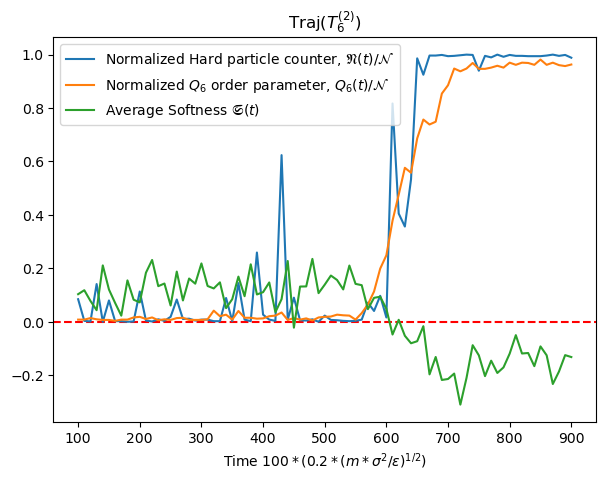

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import linecache as lc

set_ = 2
select = 5

num = 6

N = 864

N_frame = 1001;

gap = 10
T_min = 100
T_max = 900+gap
sep = np.floor((T_max - T_min) / gap).astype(np.int16)
T = np.zeros(sep, dtype = "float64")
T[0] = T_min
T[1] = T_min + gap
for i in range(2, sep):
    T[i] = T[i-1] + gap
T = T.astype(np.float32)
x = T

i = num-1
file_counter = "set_" + str(int(set_)) + "_/ans_" + str(int(select)) + "_t_" + str(int(i)) + ".csv"
file_softness = "softness_" + str(int(set_)) + "/ans_" + str(int(select)) + "_t_" + str(int(i)) + ".csv"
file_q6msd = ""

if set == 1:
    file_q6msd = "Set_1/T_" + str(int(i)) + "/nuc.log"
else:
    file_q6msd = "Set_2/T_" + str(int(i)) + "/nuc.log"
    
    
y_0 = pd.read_csv(file_counter, header=None)
y_0 = np.transpose(y_0.values)

y_1 = np.zeros((sep), dtype = "int")
y_2 = np.zeros((sep), dtype = "float64")

y_3 = pd.read_csv(file_softness, header=None)
y_3 = np.transpose(y_3.values)


v_max_1 = np.zeros((N_frame), dtype="int")
v_max_2 = np.zeros((N_frame), dtype="int")
for j in range(N_frame):
    txt = str.split(lc.getline(file_q6msd, 311 + j))
    num_str_1 = txt[6];
    if num_str_1 == "-1e+20":
        v_max_1[j] = 1
    else:
        v_max_1[j] = int(num_str_1)
    
    num_str_2 = txt[3];
    if num_str_2 == "-1e+20":
        v_max_2[j] = 0
    else:
        v_max_2[j] = np.float64(num_str_2)

for j in range(sep):
    idx = 100 + j * 10
    y_1[j] = v_max_1[idx]
    y_2[j] = v_max_2[idx]

plt.figure(figsize=[7,5])
plt.xlabel("Time $100*(0.2*(m*\sigma^2/\epsilon)^{1/2})$")

# y_0 = (y_0-np.min(y_0))/(np.max(y_0)-np.min(y_0))
# y_1 = (y_1-np.min(y_1))/(np.max(y_1)-np.min(y_1))
# y_3 = (y_3-np.min(y_3))/(np.max(y_3)-np.min(y_3))

plt.axhline(y=0, color='r', linestyle='--')

f1 ,= plt.plot(x,y_0/N)
f2 ,= plt.plot(x,y_1/N)
# f3 ,= plt.plot(x,(y_3-0.5)*2)
f3 ,= plt.plot(x,y_3)

plt.legend(handles=[f1,f2,f3], labels = ["Normalized Hard particle counter, $\mathfrak{N}(t)/\mathcal{N}$","Normalized $Q_6$ order parameter, $Q_6(t)/\mathcal{N}$", "Average Softness $\mathfrak{S}(t)$"], loc="best")

plt.title("Traj($T^{(2)}_" + str(int(num)) + "$)")

# plt.savefig("/home/chem/msrgxt/Desktop/anss.png", dpi=300)